In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [3]:
data = pd.read_csv("/Users/weilu/Research/database/membrane_training_set/proteins-2019-05-01.csv")
data.pdbid = data.pdbid.apply(lambda x: x[2:-1])

In [4]:
data.head()

,id,ordering,family_name_cache,species_name_cache,membrane_name_cache,name,description,comments,pdbid,resolution,...,species_id,family_id,superfamily_id,classtype_id,type_id,secondary_representations_count,structure_subunits_count,citations_count,created_at,updated_at
0,1,2024.0,OmpA family,Escherichia coli,Gram-neg. outer,"Outer membrane protein A (OMPA), disordered loops",NaN,OmpA is required for the action of colicins K ...,1qjp,1.65,...,9,34,26,2,1,3,1,2,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC
1,2,2028.0,Enterobacterial Ail/Lom protein,Escherichia coli,Gram-neg. outer,Outer membrane protein X (OMPX),NaN,OmpX from Escherichia coli promotes adhesion t...,1qj8,1.90,...,9,355,26,2,1,7,1,1,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC
2,3,2033.0,Opacity porins,Neisseria meningitidis,Gram-neg. outer,Outer membrane protein NspA,NaN,Pathogenic Neisseria spp. possess a repertoire...,1p4t,2.55,...,24,337,235,2,1,0,1,0,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC
3,4,1740.0,Influenza virus matrix protein 2,Influenza virus,Viral,"M2 proton channel of Influenza A, closed state...",NaN,NaN,3lbw,1.65,...,51,263,185,11,1,3,4,0,2018-08-13 03:49:46 UTC,2018-10-02 17:42:36 UTC
4,5,2045.0,"OM protease omptin, OMPT",Yersinia pestis,Gram-neg. outer,Plasminogen activator PLA (coagulase/fibrinoly...,NaN,NaN,2x55,1.85,...,299,36,27,2,1,2,1,0,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC


In [5]:
d = data.query("classtype_id == 1")
# dd = d.groupby("superfamily_id").apply(pd.DataFrame.sample, 5, replace=True).reset_index(drop=True)
dd = d.reset_index(drop=True)

In [6]:
dd.shape

(1593, 31)

In [7]:
ddd = dd.drop_duplicates().reset_index(drop=True)

In [8]:
ddd.to_csv("/Users/weilu/Research/database/membrane_training_set/chosen_large_data.csv")

In [16]:
a = pd.read_csv("/Users/weilu/Research/database/membrane_training_set/chosen_large_data.csv", index_col=0)

In [17]:
a.shape

(1593, 31)

In [18]:
# print(a.pdbid.tolist())
pdb_list = a.pdbid.tolist()

In [30]:
pre = "/Users/weilu/Research/server/may_2019/four_body_helix_large_data/database/cleaned_pdbs/"
filtered_list = []
for pdb in pdb_list:
    location = pre + f"{pdb}.pdb"
    a = get_inside_or_not_table(location)
    # ratio = sum(a)/len(a)
    ratio = sum(a)/(len(a)+1e-6)
    if ratio < 0.4:
        print("not good", pdb, ratio)
    else:
        filtered_list.append(pdb)
    # print(pdb, ratio)

not good 4wis 0.3256880728965014
not good 6dmw 0.24405705191116156
not good 6mmh 0.10695876274876448
not good 5f1c 0.13994169055410585
not good 6dmy 0.2560483868386609
not good 4u5f 0.08707482981350363
not good 4i0u 0.11527377488393725
not good 6cnm 0.3899721437605233
not good 1lv7 0.003984063729147156
not good 6qp6 0.29959514129609294
not good 6nt7 0.2755102031445231
not good 5wua 0.19195046380201095
not good 6mmx 0.10939510925431775
not good 6b2z 0.0
not good 1kf6 0.0
not good 6f0k 0.091787439170109
not good 6ajg 0.3077777774358025
not good 6dlz 0.1676829266588588
not good 3j1z 0.38851351220096786
not good 6mmi 0.11734693862583298
not good 6et5 0.01501501496992488
not good 2bbj 0.11976047868335186
not good 5fgn 0.22947761151216864
not good 5ncq 0.2439024387765219
not good 4jtc 0.0
not good 5fn4 0.03458646611340381
not good 4qin 0.3467561513495388
not good 6mm9 0.11096938761355946
not good 3jcu 0.37724550785255834
not good 3uon 0.3493150676956277
not good 4ycm 0.2424547281263031
not g

not good 1b12 0.012552301202710036
not good 6mms 0.09934640509889359
not good 6c26 0.3518518513088706
not good 5och 0.2250453716423859
not good 6niy 0.0
not good 6qma 0.3172205433274614
not good 3llo 0.0
not good 4kfm 0.20121951158164783
not good 3d9b 0.2612440188887617
not good 6eo1 0.3971830974727237
not good 2wcd 0.18947368354570637
not good 4kyt 0.24615384590138067
not good 5w3s 0.33608247353385057
not good 2zbd 0.2273641848819274
not good 6c5w 0.1473684205355494
not good 4lml 0.2677419346201873
not good 2agv 0.2434607643425948
not good 3e9j 0.0
not good 5svr 0.1529051983091584
not good 6meo 0.00251256280775738
not good 2oau 0.15748031434062867
not good 6a6n 0.21805792126395585
not good 5nmi 0.0
not good 2zup 0.010638297815753735
not good 5hi9 0.2641196008901668
not good 5z1w 0.3543123534864514
not good 3b5x 0.22552447513020196
not good 3j9v 0.0
not good 5cfb 0.2418879048911861
not good 6ds5 0.0437499997265625
not good 6d7p 0.25573770449879063
not good 6dqs 0.08188472091405091
not 

not good 2zbe 0.23239436596338595
not good 5nik 0.0
not good 6mmt 0.10997442441179742
/Users/weilu/Research/server/may_2019/four_body_helix_large_data/database/cleaned_pdbs/3bo0.pdb (' ', 1, ' ')
not good 3bo0 0.0
not good 5sv0 0.29017857013313136
not good 5vkq 0.13075383580336633
not good 6d7t 0.26513911576900306
not good 5l7d 0.26360544172856215
not good 4n6h 0.3946078421700788
not good 6cmc 0.12801932336227217
not good 5zmw 0.253999999746
not good 2fyu 0.0
not good 4h1w 0.24873096421448634
not good 6hwh 0.17894736795013852
/Users/weilu/Research/server/may_2019/four_body_helix_large_data/database/cleaned_pdbs/3j7r.pdb (' ', 1, ' ')
not good 3j7r 0.0
not good 5kbu 0.16855087341361677
not good 6d7q 0.2617449660037836
not good 5va1 0.24821428527104591
not good 5khn 0.3290094335742813
not good 4rdq 0.2295081960942399
not good 5svk 0.1372549015763168
not good 5kuf 0.08266666655644445
not good 5do7 0.2598290593849076
not good 5iwk 0.2558922554614608
not good 5t1a 0.34606741495265747
not go

In [31]:
len(filtered_list)

829

In [21]:
pre = "/Users/weilu/Research/server/may_2019/four_body_helix_large_data/database/"
a = glob.glob(pre+"cleaned_pdbs/*")

In [24]:
b = [i.split("/")[-1][:4] for i in a]

In [25]:
pdb_list = b

In [33]:
pre = "/Users/weilu/Research/server/may_2019/four_body_helix_large_data/database/"
for pdb in pdb_list:
    toLocation = pre + f"dompdb/{pdb}.pdb"
    location = pre + f"cleaned_pdbs/{pdb}.pdb"
    try:
        extractTransmembrane(toLocation, location)
    except:
        pass

In [28]:
pre = "/Users/weilu/Research/server/may_2019/four_body_helix_large_data/database/dompdb/"
filtered_list = []
for pdb in pdb_list:
    location = pre + f"{pdb}.pdb"
    a = get_inside_or_not_table(location)
    # ratio = sum(a)/len(a)
    ratio = sum(a)/(len(a)+1e-6)
    if ratio < 0.4:
        print("not good", pdb, ratio)
    else:
        filtered_list.append(pdb)
    # print(pdb, ratio)

not good 6b2z 0.0
not good 1kf6 0.0
not good 4jtc 0.0
not good 5fl7 0.0
not good 4p6v 0.0
not good 5x5y 0.0
not good 5but 0.0
not good 2h88 0.0
not good 2leg 0.0
not good 5uz7 0.0
not good 5i5h 0.0
not good 1q16 0.0
not good 2vpx 0.0
not good 6n2y 0.0
not good 2w5q 0.0
not good 6iok 0.0
not good 5xtc 0.0
not good 3lut 0.0
not good 5i5f 0.0
not good 1dxr 0.0
not good 6d9h 0.0
not good 6mit 0.0
not good 6gcs 0.0
not good 5nf8 0.0
not good 6j8i 0.0
not good 1bcc 0.0
not good 3zry 0.0
not good 5v78 0.0
not good 4ymu 0.0
not good 5uph 0.0
not good 5jsz 0.0
not good 3j9t 0.0
not good 3j7q 0.0
not good 4j7c 0.0
not good 1nek 0.0
not good 3ne5 0.0
not good 5gae 0.0
not good 6hu9 0.0
not good 3lnm 0.0
not good 1pp9 0.0
not good 1fjr 0.0
not good 6cvl 0.0
not good 6niy 0.0
not good 3llo 0.0
not good 3e9j 0.0
not good 5nmi 0.0
not good 3j9v 0.0
not good 3sn6 0.0
not good 3din 0.0
not good 3bcc 0.0
not good 4b2q 0.0
not good 5xu1 0.0
not good 6mjp 0.0
not good 6haw 0.0
not good 3b8n 0.0
not good 6

In [29]:
len(filtered_list)

1471

In [32]:
pdb_list = filtered_list

In [39]:
pre = "/Users/weilu/Research/server/may_2019/four_body_helix_large_data/"

In [40]:
with open(f"{pre}/optimization/protein_list", "w") as out:
    for pdb in pdb_list:
        # print(pdb)
        out.write(pdb+"\n")

In [38]:

for pdb in pdb_list:
    location = f"{pre}/dompdb/{pdb}.pdb"
    toLocation = f"{pre}/S20_seq/{pdb}.seq"
    seq,resseqs = getSeqFromPDB(location, considerGap=False)
    with open(toLocation, "w") as out:
        out.write(seq+'\n')

In [46]:
pre = '/Users/weilu/Research/server/may_2019/four_body_helix/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma"
gamma_k1000 = np.loadtxt(location)

pre = '/Users/weilu/Research/server/may_2019/four_body_helix_repeat_n_decoys2000/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma"
gamma_k2000 = np.loadtxt(location)

pre = '/Users/weilu/Research/server/may_2019/four_body_helix_repeat_n_decoys4000/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma"
gamma_k4000 = np.loadtxt(location)

pre = '/Users/weilu/Research/server/may_2019/four_body_helix_repeat_n_decoys8000/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma"
gamma_k8000 = np.loadtxt(location)

pre = '/Users/weilu/Research/server/may_2019/four_body_helix_repeat_n_decoys8000/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_10_True_gamma_filtered"
gamma_k8000_f = np.loadtxt(location)


In [4]:
pre = '/Users/weilu/Research/server/may_2019/four_body/four_body_helix_use_cb_complete_phi/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_6_Truephi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_gamma"
gamma_complete_phis = np.loadtxt(location)


In [5]:
name = "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_6_Truephi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)


In [6]:
from pyCodeLib import *

In [7]:
total_phis = len(A)
num_decoys = 1000
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=726)

726


In [9]:
six_letter_code_combinations = ['000004', '000013', '000022', '000031', '000040', '000103', '000112', '000121', '000130', '000202', '000211', '000220', '000301', '000310', '000400', '001003', '001012', '001021', '001030', '001102', '001111', '001120', '001201', '001210', '001300', '002002', '002011', '002020', '002101', '002110', '002200', '003001', '003010', '003100', '004000', '010003', '010012', '010021', '010030', '010102', '010111', '010120', '010201', '010210', '010300', '011002', '011011', '011020', '011101', '011110', '011200', '012001', '012010', '012100', '013000', '020002', '020011', '020020', '020101', '020110', '020200', '021001', '021010', '021100', '022000', '030001', '030010', '030100', '031000', '040000', '100003', '100012', '100021', '100030', '100102', '100111', '100120', '100201', '100210', '100300', '101002', '101011', '101020', '101101', '101110', '101200', '102001', '102010', '102100', '103000', '110002', '110011', '110020', '110101', '110110', '110200', '111001', '111010', '111100', '112000', '120001', '120010', '120100', '121000', '130000', '200002', '200011', '200020', '200101', '200110', '200200', '201001', '201010', '201100', '202000', '210001', '210010', '210100', '211000', '220000', '300001', '300010', '300100', '301000', '310000', '400000']
six_letter_code_combinations = np.array(six_letter_code_combinations)

In [10]:
g = -filtered_gamma[:126]
sorted_letter = six_letter_code_combinations[np.argsort(g)]
y_g = g[np.argsort(g)]

In [47]:
from adjustText import adjust_text

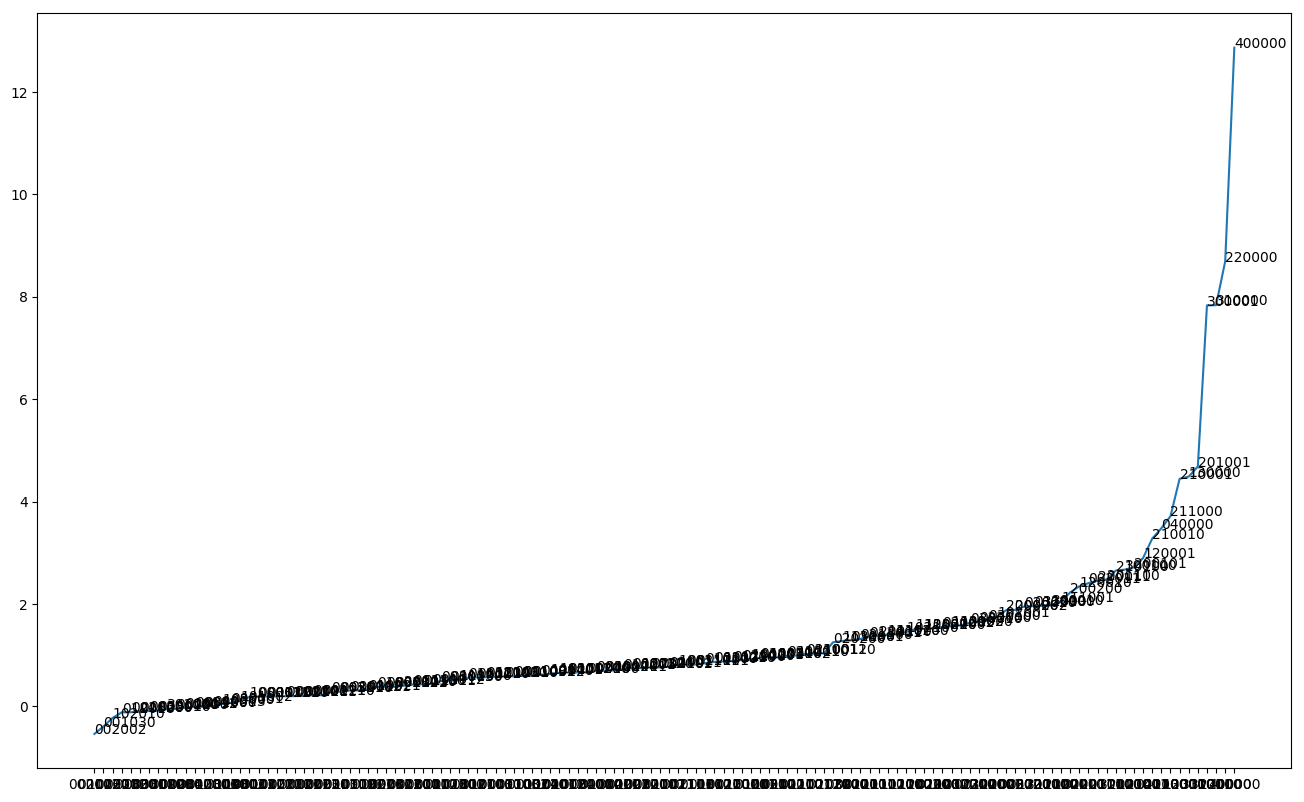

In [14]:
fig, ax = plt.subplots()
ax.plot(sorted_letter, y_g)
for i, txt in enumerate(sorted_letter):
    ax.annotate(txt, (i, y_g[i]))

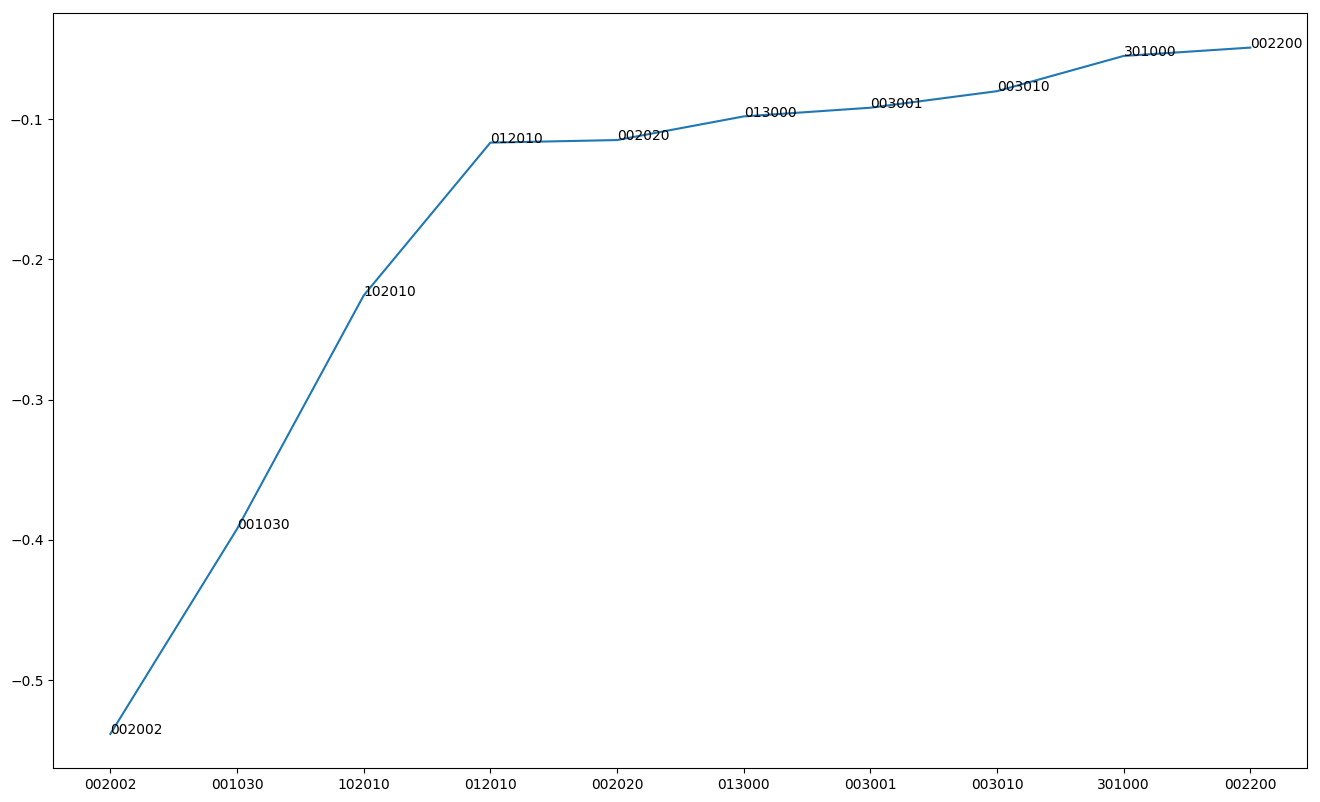

In [11]:
fig, ax = plt.subplots()
ax.plot(sorted_letter[:10], y_g[:10])
for i, txt in enumerate(sorted_letter[:10]):
    ax.annotate(txt, (i, y_g[i]))

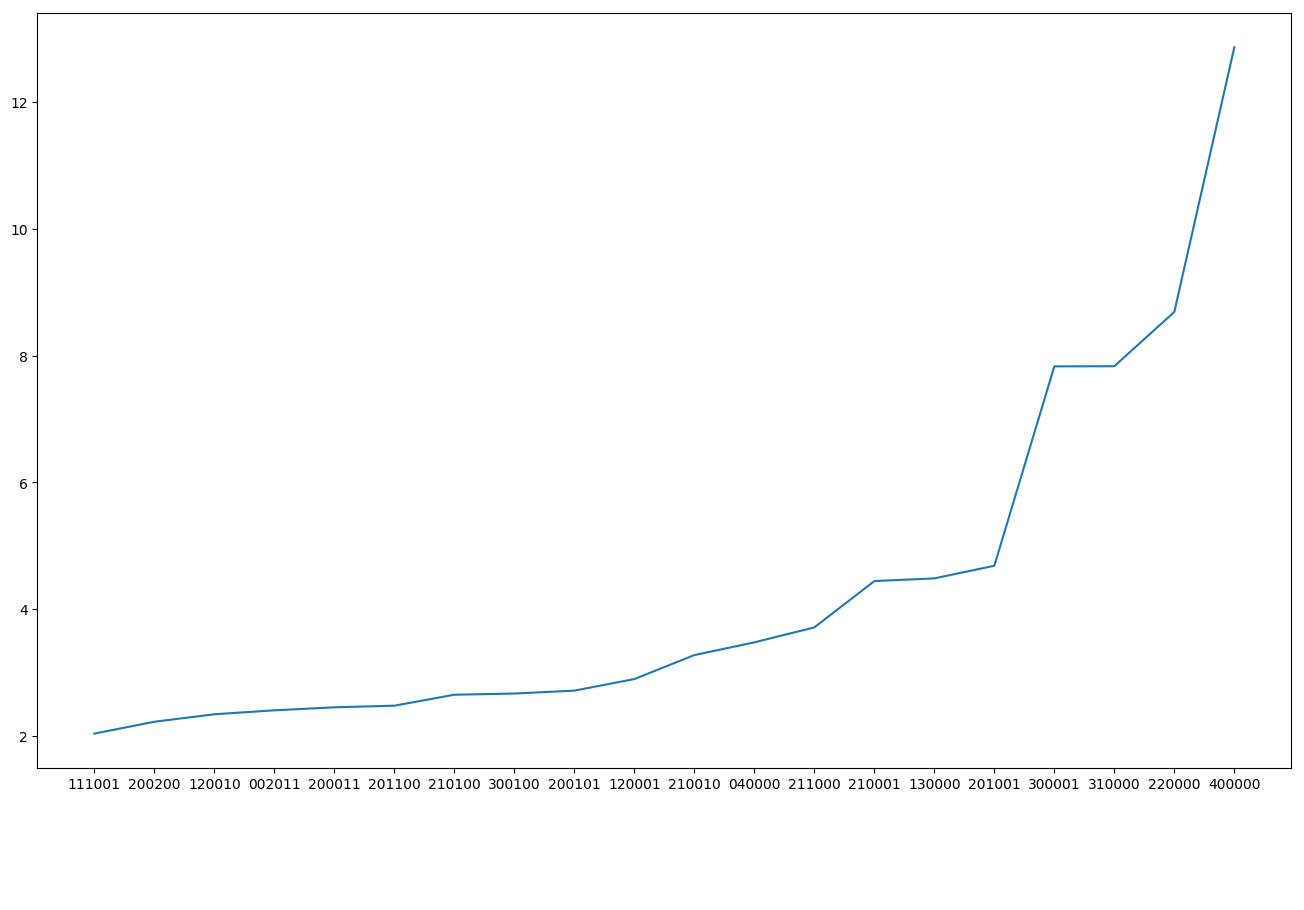

In [16]:
fig, ax = plt.subplots()
ax.plot(sorted_letter[-20:], y_g[-20:])
for i, txt in enumerate(sorted_letter[-20:]):
    ax.annotate(txt, (i, y_g[i]))

In [12]:
gamma_complete_phis.shape

(126,)

In [24]:
gamma_complete_phis = gamma_complete_phis[:126]
sorted_letter = six_letter_code_combinations[np.argsort(gamma_complete_phis)]

In [30]:
gamma_complete_phis.round(1)

array([ -0.8,  -0.1,  -0.8,  -0.1,  -1.7,  -0.6,  -0. ,  -0.3,  -0.6,
        -0.4,  -0.3,  -0.3,  -0.4,  -0.4,  -0.7,  -0.6,  -0.5,  -1. ,
        -0.1,  -0.5,  -0.3,  -0.3,  -0.3,  -0.3,  -0.5,   0.4,  -3.6,
        -0.5,  -0.9,  -0.3,  -0. ,   0.8,   0.8,  -0.9,   7.6,  -0.4,
        -0.7,  -0.4,  -1. ,  -0.8,  -0.6,  -0.7,  -0.8,  -0.6,  -0.9,
        -0.7,  -0.5,  -0.8,  -0.9,  -0.7,  -1. ,  -1.4,   0.1,  -0.6,
        -0.4,  -1.6,  -0.8,  -2. ,  -1.1,  -0.8,  -1.3,  -1.1,  -1. ,
        -1.4,  -1.8,  -1.4,  -1.7,  -1.8,  -2. ,  -3.5,  -0.2,  -0.8,
        -0.3,  -0.7,  -1. ,  -0.9,  -1.1,  -1. ,  -0.7,  -0.8,  -0.3,
        -0.8,  -0.4,  -0.7,  -1. ,  -1. ,  -3.7,   0.2,  -1.3,  -2. ,
        -1.6,  -1.1,  -1.6,  -1.6,  -1.1,  -1.5,  -2.1,  -1.5,  -1.4,
        -0.5,  -3. ,  -2.4,  -2.1,  -1.7,  -4.6,  -2. ,  -2.5,  -2. ,
        -2.8,  -1.5,  -2.3,  -4.6,  -0.3,  -2.5,  -8.1,  -4.5,  -3.4,
        -2.7,  -3.8,  -8.7,  -7.5,  -1.3,  -2.3,   1. ,  -7.5, -43.5])

In [29]:
y.round(1)

array([-43.5,  -8.7,  -8.1,  -7.5,  -7.5,  -4.6,  -4.6,  -4.5,  -3.8,
        -3.7,  -3.6,  -3.5,  -3.4,  -3. ,  -2.8,  -2.7,  -2.5,  -2.5,
        -2.4,  -2.3,  -2.3,  -2.1,  -2.1,  -2. ,  -2. ,  -2. ,  -2. ,
        -2. ,  -1.8,  -1.8,  -1.7,  -1.7,  -1.7,  -1.6,  -1.6,  -1.6,
        -1.6,  -1.5,  -1.5,  -1.5,  -1.4,  -1.4,  -1.4,  -1.4,  -1.3,
        -1.3,  -1.3,  -1.1,  -1.1,  -1.1,  -1.1,  -1.1,  -1. ,  -1. ,
        -1. ,  -1. ,  -1. ,  -1. ,  -1. ,  -1. ,  -0.9,  -0.9,  -0.9,
        -0.9,  -0.9,  -0.8,  -0.8,  -0.8,  -0.8,  -0.8,  -0.8,  -0.8,
        -0.8,  -0.8,  -0.8,  -0.7,  -0.7,  -0.7,  -0.7,  -0.7,  -0.7,
        -0.7,  -0.7,  -0.6,  -0.6,  -0.6,  -0.6,  -0.6,  -0.6,  -0.5,
        -0.5,  -0.5,  -0.5,  -0.5,  -0.5,  -0.4,  -0.4,  -0.4,  -0.4,
        -0.4,  -0.4,  -0.4,  -0.3,  -0.3,  -0.3,  -0.3,  -0.3,  -0.3,
        -0.3,  -0.3,  -0.3,  -0.3,  -0.3,  -0.2,  -0.1,  -0.1,  -0.1,
        -0. ,  -0. ,   0.1,   0.2,   0.4,   0.8,   0.8,   1. ,   7.6])

In [20]:
y = gamma_complete_phis[np.argsort(gamma_complete_phis)]

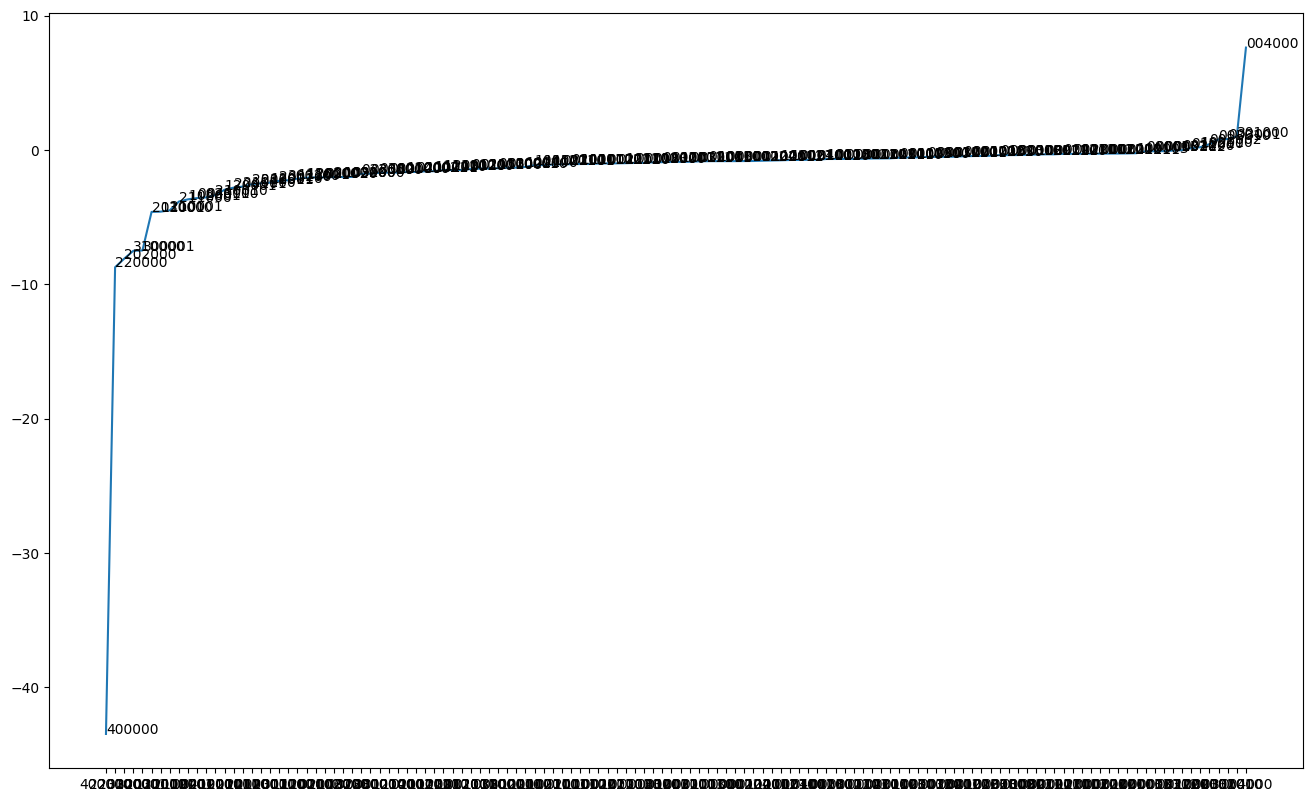

In [21]:
fig, ax = plt.subplots()
ax.plot(sorted_letter, gamma_complete_phis[np.argsort(gamma_complete_phis)])
for i, txt in enumerate(sorted_letter):
    ax.annotate(txt, (i, y[i]))

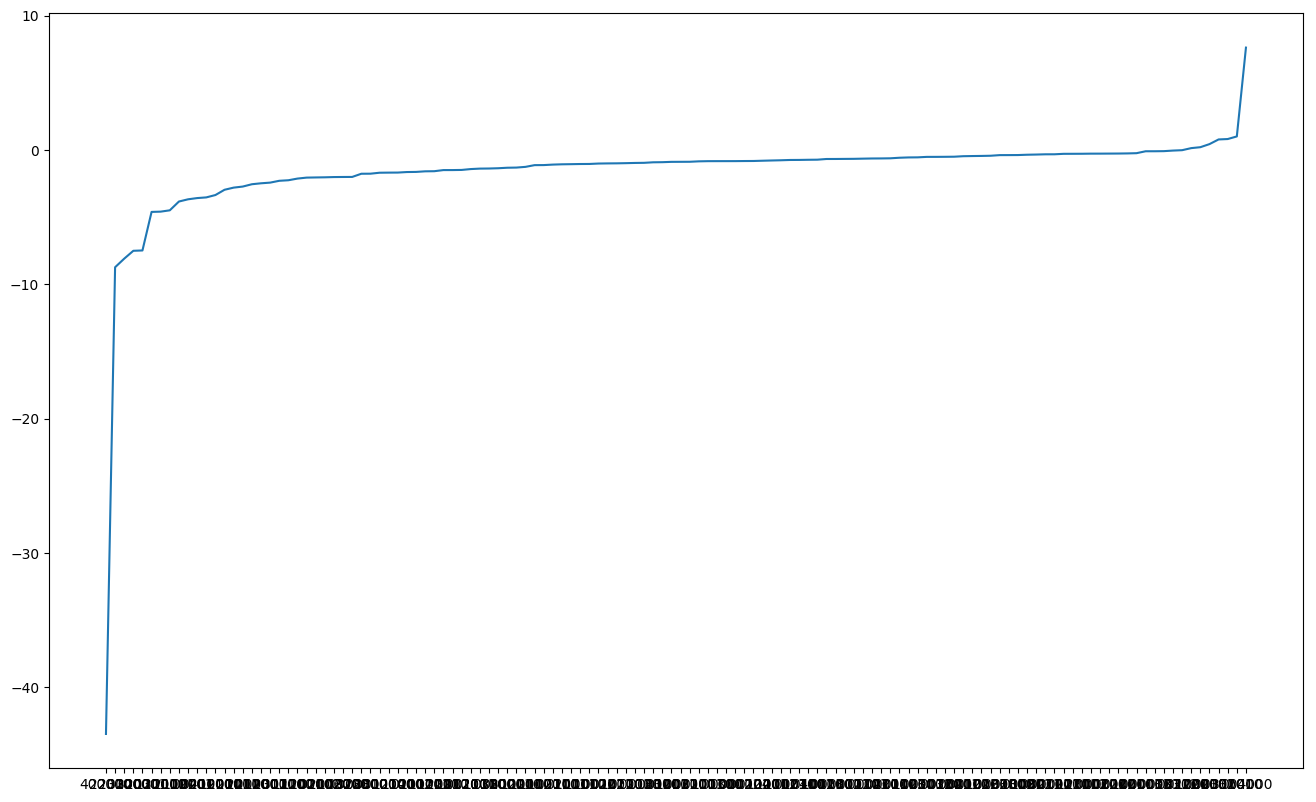

In [18]:
plt.plot(sorted_letter, gamma_complete_phis[np.argsort(gamma_complete_phis)])

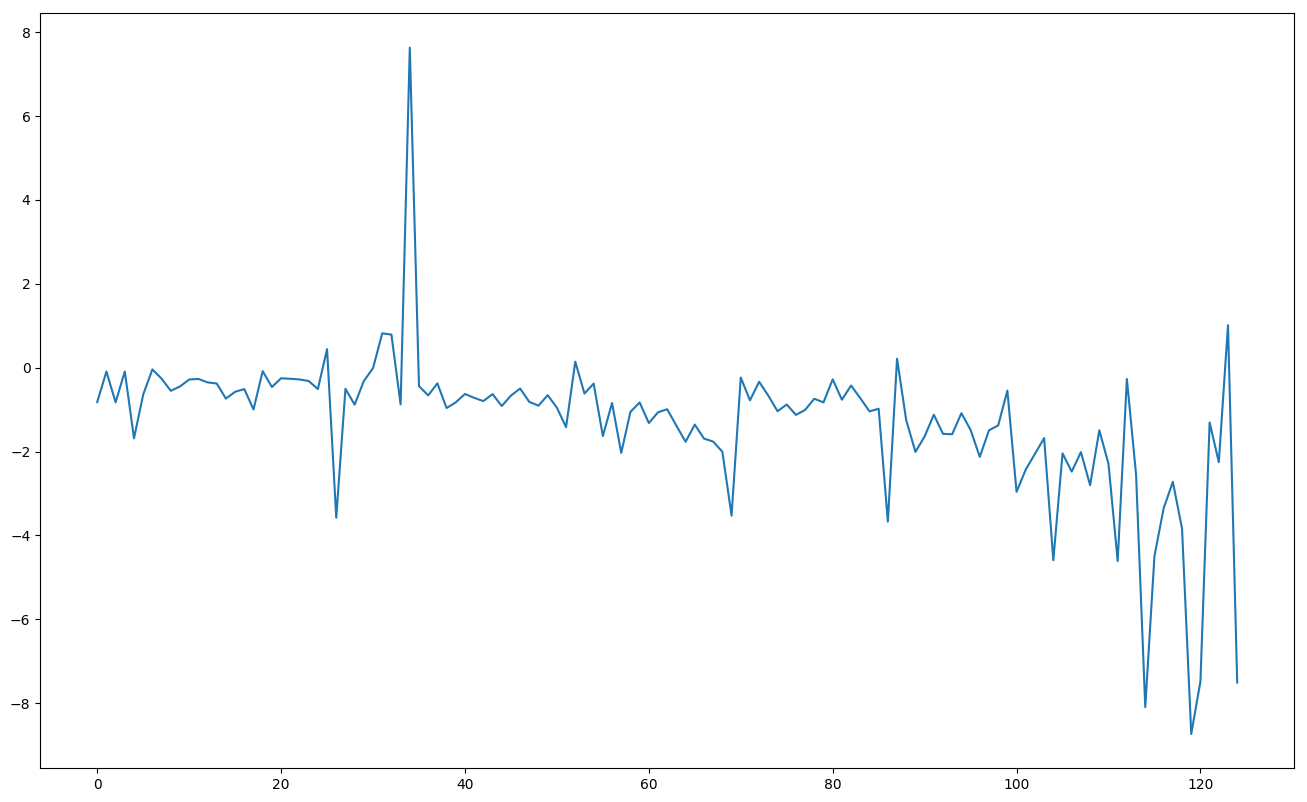

In [10]:
plt.plot(gamma_complete_phis[:125])

In [45]:
pre = '/Users/weilu/Research/server/may_2019/four_body_helix_large_data/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_6_True_gamma_filtered"
gamma_large = np.loadtxt(location)

In [47]:
pre = '/Users/weilu/Research/server/may_2019/four_body_helix_more_data/optimization/'
location = pre + "gammas/protein_list_phi_six_letter_four_body_helix_docking3.5_6.5_5.0_6_True_gamma"
gamma_more = np.loadtxt(location)

In [55]:
six_letter_code_combinations = np.array(six_letter_code_combinations)

In [52]:
np.argsort(gamma_large)

array([125, 123, 124, 114, 119, 120, 111, 105, 104, 107, 118,  69,  97,
       116, 115, 110,   4, 121,  92,  87, 108, 101,  70, 100, 117,  62,
        72,  67,  57, 122,  68, 113,  96,  52,  66, 102,  80,  65,   3,
        93,  90,  27,  60,  95,  63,  26,  76,  86,  55, 103,  61,  59,
        38,  91,  94,  50,  73, 109,  58,  35,  81,  56,  47,  98,  41,
        44,  46,  14,  37,  79,  77,  49,  51,  83,  42, 106,  85,  39,
        16,  40,   8,  23,  43,   7,  48,   5, 112,  84,  75,  24,  74,
        12,  78,  36,  71,  45,  32,  17,  28,   9,  25,  15,  22,  20,
        11,  13,  10,  88,   6,  29,  21,   2,  64,  19,  33,  18,   1,
         0,  30,  53,  54,  99,  82,  31,  34,  89])

In [56]:
sorted_letter = six_letter_code_combinations[np.argsort(gamma_large)]

In [63]:
np.sum(gamma_large < -3)

8

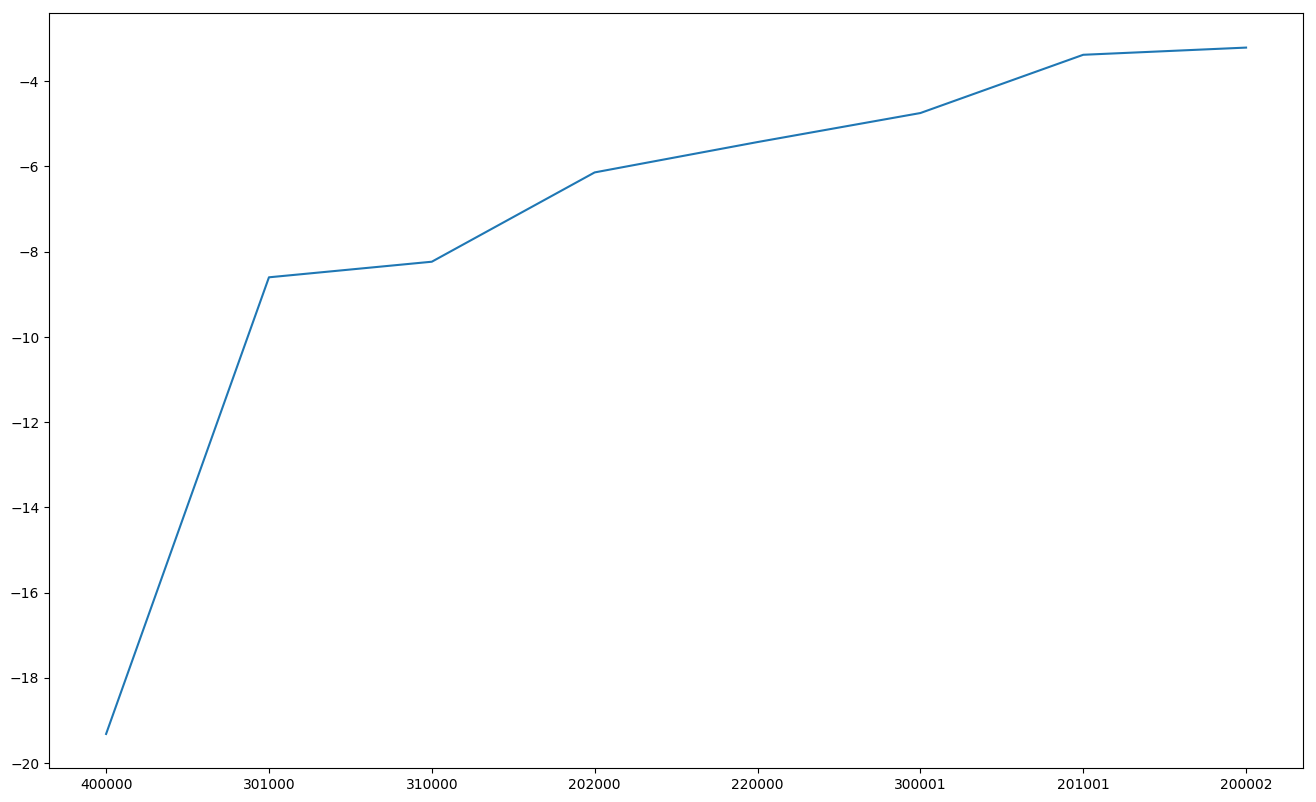

In [64]:
plt.plot(sorted_letter[:8], gamma_large[np.argsort(gamma_large)][:8])

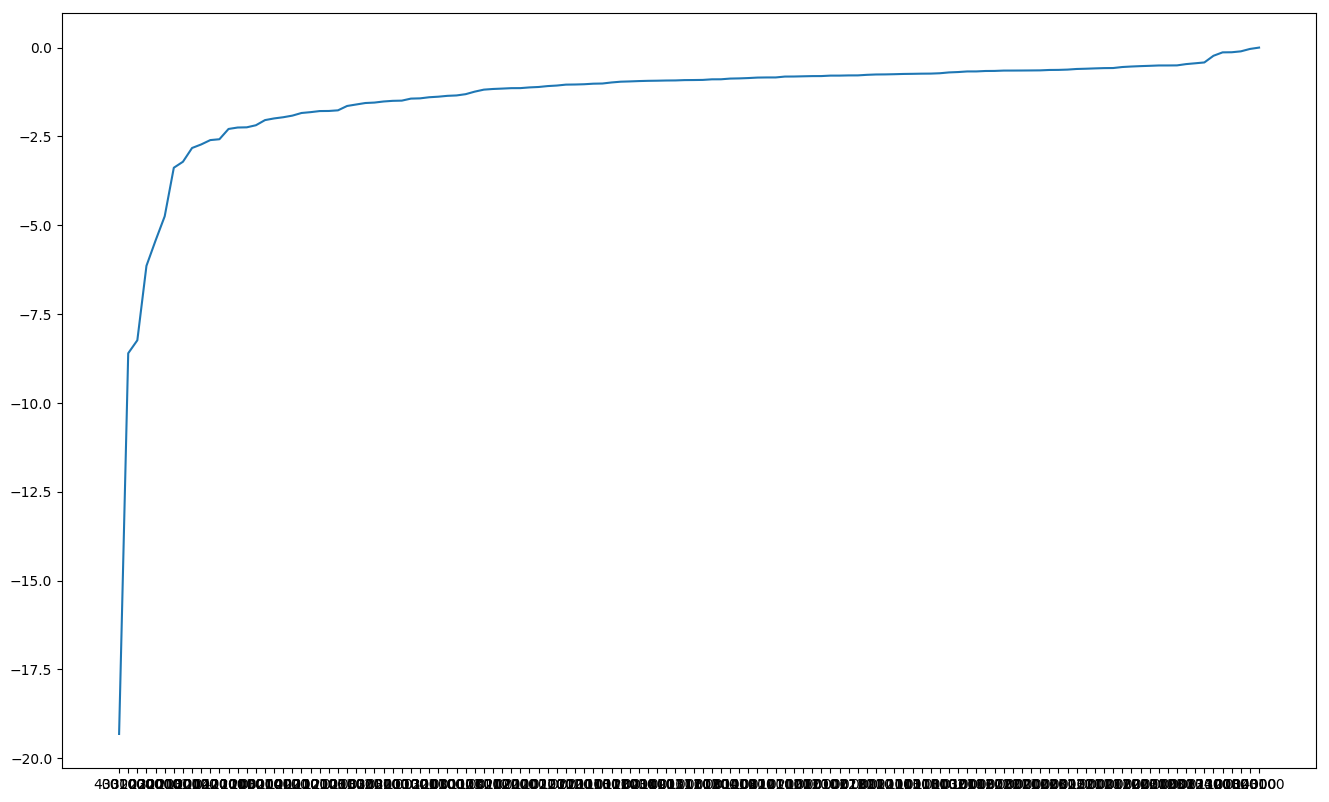

In [59]:
plt.plot(sorted_letter, gamma_large[np.argsort(gamma_large)])

In [57]:
sorted_letter

array(['400000', '301000', '310000', '202000', '220000', '300001',
       '201001', '200002', '130000', '200020', '211000', '040000',
       '111010', '210010', '210001', '200200', '000040', '300010',
       '110020', '102010', '200101', '120010', '100003', '120001',
       '210100', '021010', '100021', '030100', '020020', '300100',
       '031000', '201100', '111001', '012010', '030010', '120100',
       '101002', '030001', '000031', '110101', '110002', '002020',
       '020200', '110200', '021100', '002011', '100120', '102001',
       '020002', '121000', '021001', '020110', '010030', '110011',
       '110110', '011200', '100030', '200110', '020101', '010003',
       '101011', '020011', '011020', '111100', '010120', '010300',
       '011011', '000400', '010021', '100300', '100201', '011110',
       '012001', '101101', '010201', '200011', '101200', '010102',
       '001012', '010111', '000130', '001210', '010210', '000121',
       '011101', '000103', '201010', '101110', '100111', '0013

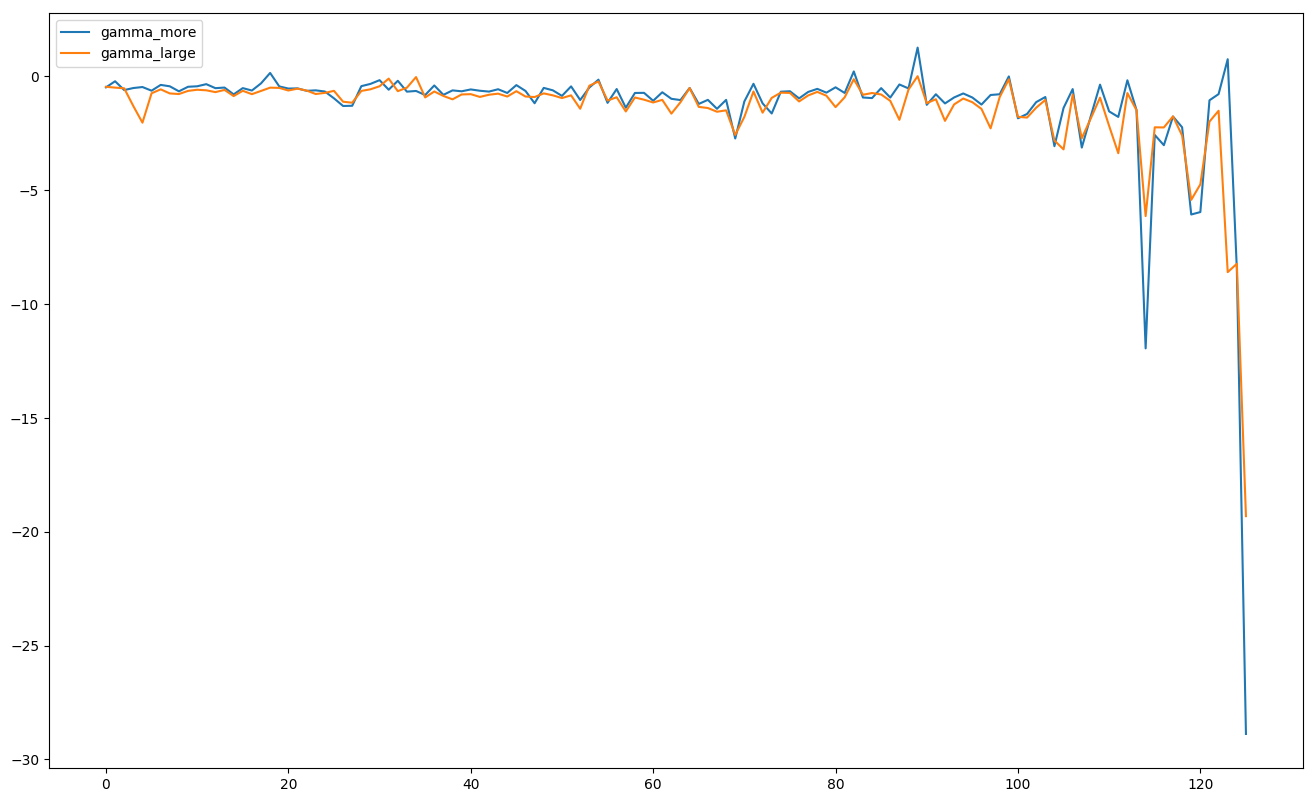

In [61]:
plt.plot(gamma_more, label="gamma_more")
plt.plot(gamma_large, label="gamma_large")
# plt.plot(gamma_k8000, label="k8000")
# plt.plot(gamma_k8000_centered, label="k8000_center")
plt.legend()
# plt.ylim(-5,5)

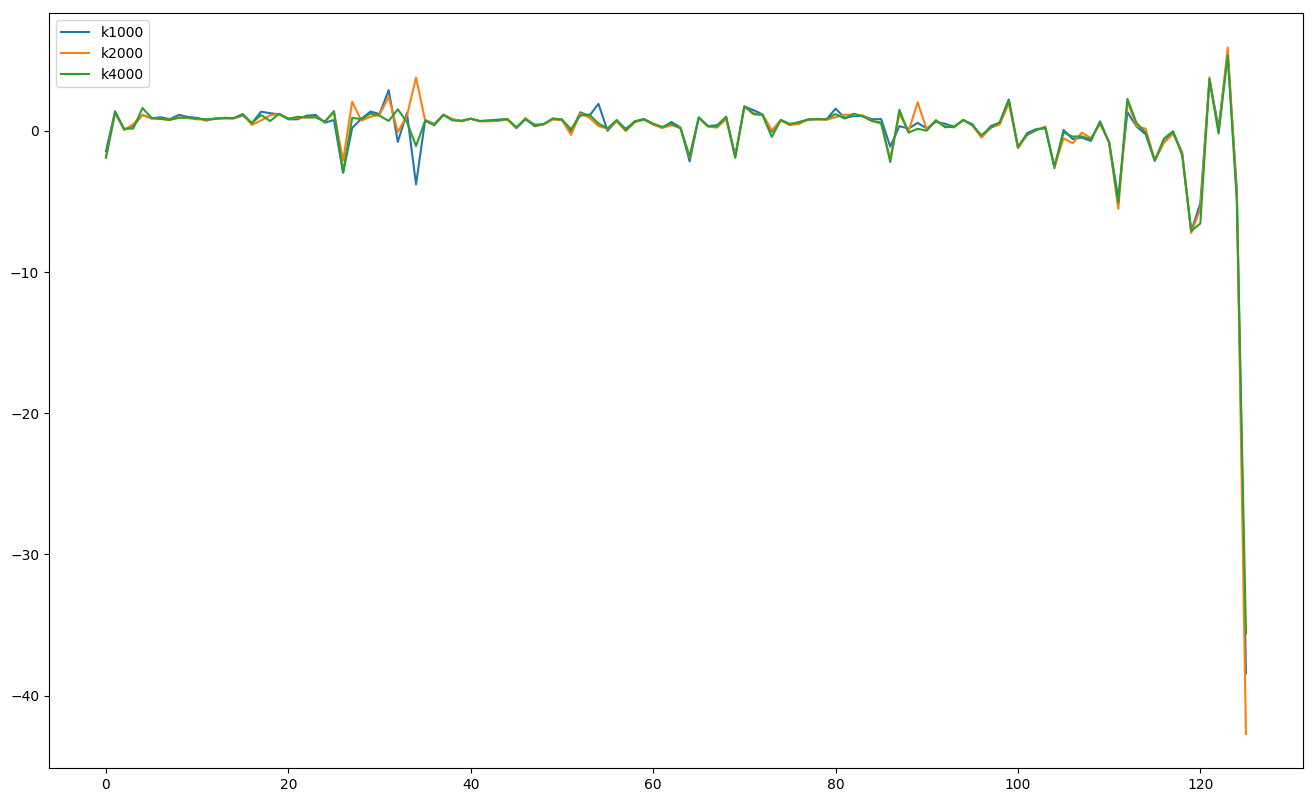

In [60]:
plt.plot(gamma_k1000, label="k1000")
plt.plot(gamma_k2000, label="k2000")
plt.plot(gamma_k4000, label="k4000")
# plt.plot(gamma_more, label="gamma_more")
# plt.plot(gamma_large, label="gamma_large")
# plt.plot(gamma_k8000, label="k8000")
# plt.plot(gamma_k8000_centered, label="k8000_center")
plt.legend()

(-5, 5)

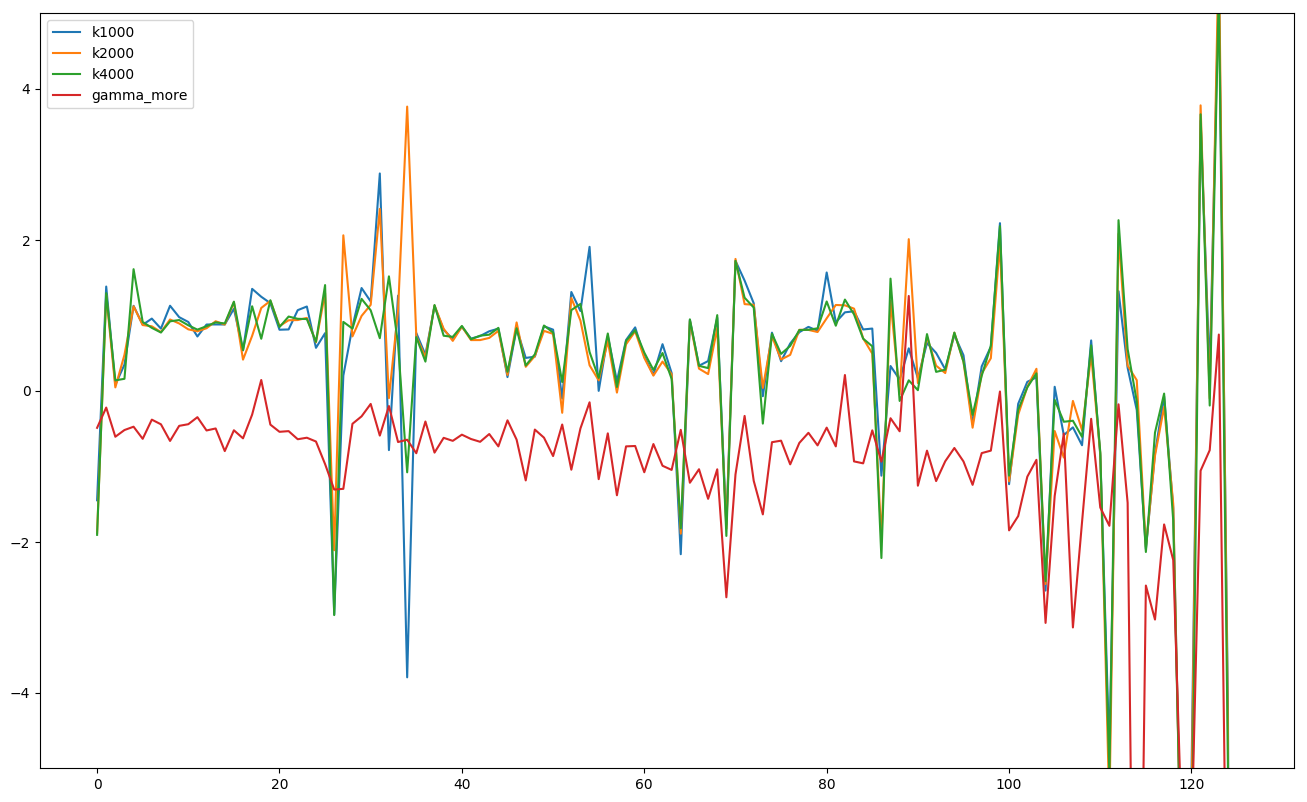

In [48]:
plt.plot(gamma_k1000, label="k1000")
plt.plot(gamma_k2000, label="k2000")
plt.plot(gamma_k4000, label="k4000")
plt.plot(gamma_more, label="gamma_more")
# plt.plot(gamma_k8000, label="k8000")
# plt.plot(gamma_k8000_centered, label="k8000_center")
plt.legend()
plt.ylim(-5,5)

In [50]:
import glob
a = glob.glob("/Users/weilu/Research/server/may_2019/four_body_helix_more_data/optimization/data/*.dat")
data_all = []
for d in a:
    name = d.split("/")[-1].split("-")[0]
    tmp = pd.read_csv(d, sep=" ", names=["res_pair1_chain", "res_pair1_index_1", "res_pair1_index_2", 
                               "res_pair2_chain", "res_pair2_index_1", "res_pair2_index_2", 
                               "res_type",  "six_letter_string", "total_phi",
                              "d00", "d11", "d01", "d10"])
    data_all.append(tmp.assign(protein=name))
data = pd.concat(data_all)
data = data.reset_index(drop=True)
data["six_letter_string"] = data["six_letter_string"].astype(str).str.pad(width=6, fillchar="0")

In [52]:
data.head()

,res_pair1_chain,res_pair1_index_1,res_pair1_index_2,res_pair2_chain,res_pair2_index_1,res_pair2_index_2,res_type,six_letter_string,total_phi,d00,d11,d01,d10,protein
0,A,15,19,A,77,81,GAVF,110101,0.691777,8.218560,9.569242,6.418541,4.126931,2c3e
1,A,17,21,A,283,287,ASGL,120100,0.687627,10.557247,5.287187,6.421049,4.385104,2c3e
2,A,17,21,A,286,290,ASVY,020101,0.995874,8.894876,6.960624,5.734986,4.060895,2c3e
3,A,18,22,A,76,80,AKNY,010021,0.987386,8.097395,8.315829,4.241660,3.940909,2c3e
4,A,19,23,A,73,77,ATNV,020110,0.995154,9.297452,6.720541,4.126931,5.918079,2c3e


In [53]:
data["six_letter_string"].value_counts()

020200    710
010300    505
030100    430
110200    427
120100    422
010201    413
020101    334
110101    295
210100    244
020110    242
010210    240
130000    210
220000    204
000400    200
120001    195
110110    176
000301    161
010111    157
010102    145
100300    144
100201    142
200200    135
011200    131
120010    128
040000    125
030001    124
021100    109
210001    108
000310    101
200101     98
         ... 
011002      8
100012      7
100030      7
101011      6
000022      6
202000      5
012100      5
000031      4
001012      4
101002      4
022000      3
012010      3
201010      2
012001      2
002101      2
001003      2
301000      2
002011      2
000004      2
000013      2
102100      2
002002      1
102010      1
002110      1
102001      1
002020      1
112000      1
000040      1
002200      1
001021      1
Name: six_letter_string, Length: 118, dtype: int64

In [ ]:
def getSeqFromPDB(location, considerGap=True):
    x = PDBParser().get_structure("x", location)
    seq = ""
    resseqs = []
    preResId = 0
    for res in x.get_residues():
        resId = res.get_id()[1]
        if considerGap and resId != preResId + 1:
            seq += " "
            resseqs.append(-1)
        seq += three_to_one(res.get_resname())
        resseqs.append(res.get_id()[1])
        preResId = resId
    return seq,resseqs